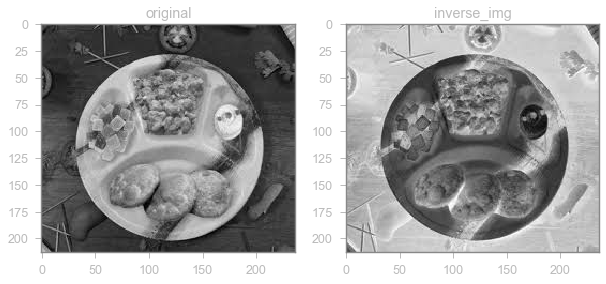

In [81]:
import cv2
import matplotlib.pyplot as plt
import numpy as Food
O_img=cv2.cvtColor(cv2.imread('Food.jpg',0),cv2.COLOR_BGR2RGB) #Gray Level
plt.subplots(figsize=(10,20))
plt.subplot(121),plt.title("original"),plt.imshow(O_img)

inverse_img=255-O_img
plt.subplot(122),plt.title("inverse_img"),plt.imshow(inverse_img)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


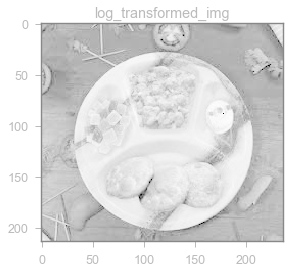

In [67]:
#Log-Transformation
c=255/(np.log(1+np.max(O_img)))
log_transformed=np.array(c * np.log(1+O_img),dtype=np.uint8)
plt.title("log_transformed_img"),plt.imshow(log_transformed)
plt.show()

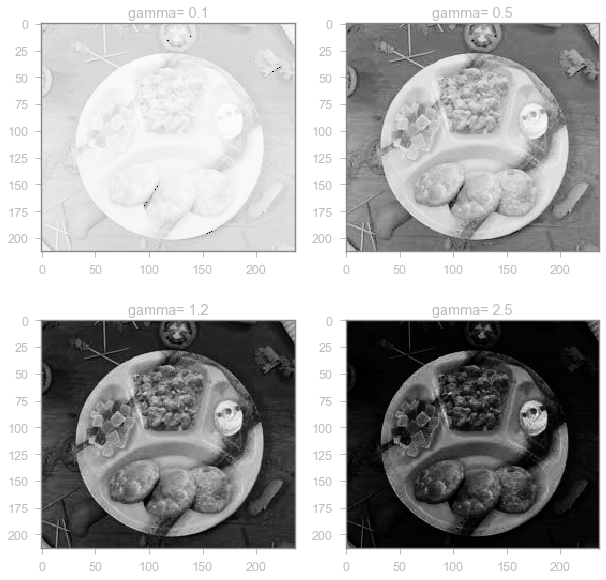

In [68]:
#Power-Law (Gamma) Transformation 
plt.subplots(figsize=(10,10))
for sp,gamma in enumerate([0.1,0.5,1.2,2.5]):
    gamma_corrected=np.array(255*(O_img/255)**gamma, dtype=np.uint8)
    plt.subplot(221+sp),plt.title("gamma= "+str(gamma)),plt.imshow(gamma_corrected)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


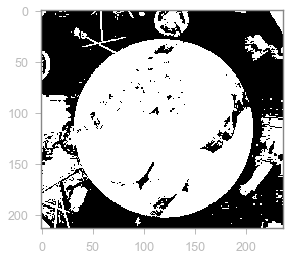

In [72]:
#Piecewise-Linear Transformation Functions
#Contrast streching

# Function to map each intensity level to output intensity level. 
def pixelVal(pix,r1,s1,r2,s2):
    if(pix>=0 and pix<=r1):
        return (s1/r1)*pix
    elif(pix>r1 and pix<=r2):
        return ((s2-s1)/(r2-r1)) * (pix-r1)+s1
    else:
        return ((255-s2)/(255-r2)) * (pix-2)+s2

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec=np.vectorize(pixelVal)
contrast_stretched = pixelVal_vec(O_img, 70,0,140,255)
plt.imshow(contrast_stretched)
plt.show()

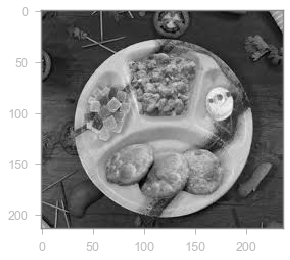

In [82]:
#Grey Level or Intensity slicing
mask=cv2.inRange(O_img,100,150)# 100-150 grey levels
im_grey_Scaling=O_img.copy()
im_grey_Scaling[mask>0]=255
plt.imshow(im_grey_Scaling),plt.title("Intensity_slicing")
plt.show()

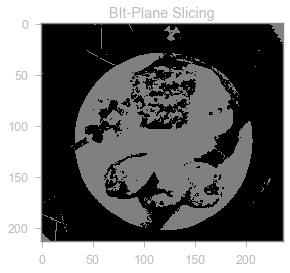

In [86]:
#BIt-Plane Slicing
bit_plane=O_img.copy()
bit_plane_no=8
for i in range(O_img.shape[0]):
    for j in range(O_img.shape[1]):
        bit_plane[i,j]=(O_img[i,j] & 2**(bit_plane_no-1))
plt.imshow(bit_plane),plt.title("BIt-Plane Slicing")
plt.show()